In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
#import geopandas as gpd
import matplotlib.pyplot as plt
import csv
import numpy as np
import xarray as xr
import regionmask
from shapely.geometry import Polygon
import cartopy.crs as ccrs
import cartopy.feature as feature
import cmocean.cm

In [3]:
#ev = xr.open_dataset('EXPOSED_VALUE/asia_exposed_value.nc')
ev = xr.open_dataset('EXPOSED_VALUE/exposed_value_reduced.nc')
ev_litpop = xr.open_dataset('EXPOSED_VALUE/LitPopExposure_World.nc')

In [4]:
ev

<xarray.Dataset>
Dimensions:        (lat: 18720, lon: 43200)
Coordinates:
  * lon            (lon) float64 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat            (lat) float64 -72.0 -71.99 -71.98 -71.97 ... 83.98 83.99 84.0
Data variables:
    exposed_value  (lat, lon) float64 ...

In [5]:
ev_litpop

<xarray.Dataset>
Dimensions:  (lat: 15124, lon: 42772)
Coordinates:
  * lat      (lat) float32 -52.012 -52.004 -51.995 ... 73.995 74.004 74.012
  * lon      (lon) float32 -177.012 -177.004 -176.995 ... 179.404 179.412
Data variables:
    data     (lat, lon) float32 ...

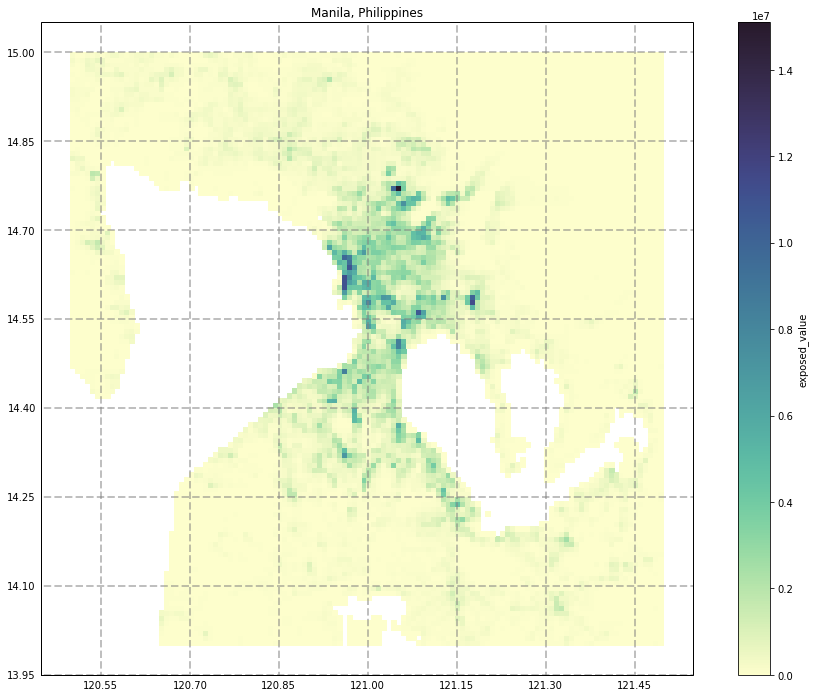

In [14]:
# Just Manila

evr = ev.sel(lat = slice(14,15), lon = slice(120.5,121.5))

plt.figure(figsize=(16, 12))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
evr.exposed_value.plot(cmap = cmocean.cm.deep)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
plt.title('Manila, Philippines')
plt.tight_layout()

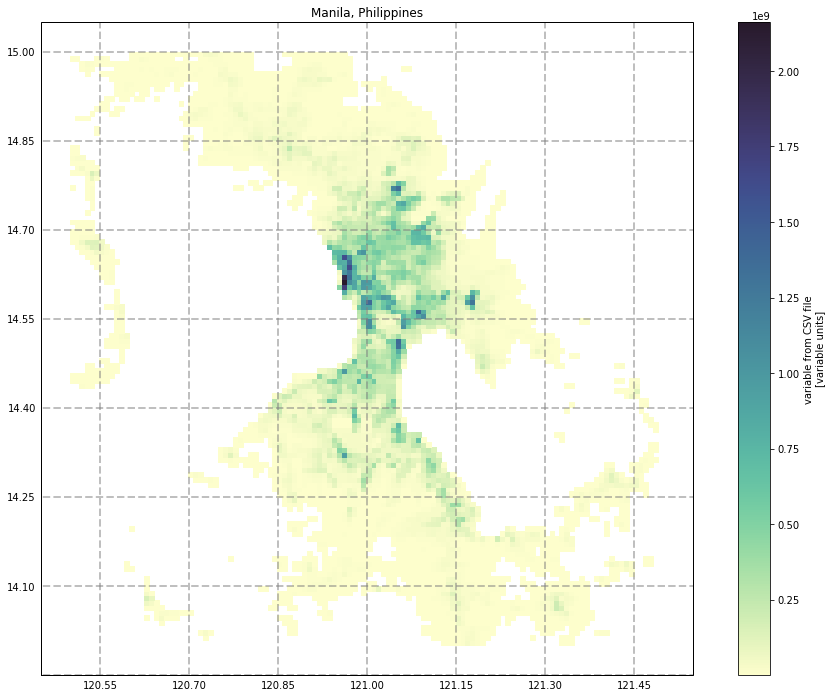

In [13]:
# Just Manila LitPop

evr_litpop = ev_litpop.sel(lat = slice(14,15), lon = slice(120.5,121.5))

plt.figure(figsize=(16, 12))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
evr_litpop.data.plot(cmap = cmocean.cm.deep)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
plt.title('Manila, Philippines')
plt.tight_layout()

In [19]:
sum_mydata = evr.sum(dim='lon').sum(dim='lat')
"{:e}".format(sum_mydata.exposed_value.values)

'1.181288e+10'

In [21]:
sum_litpop = evr_litpop.sum(dim='lon').sum(dim='lat')
"{:e}".format(sum_litpop.data.values)

'6.187969e+11'

/home/jbaldwin/.conda/envs/worldbank/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


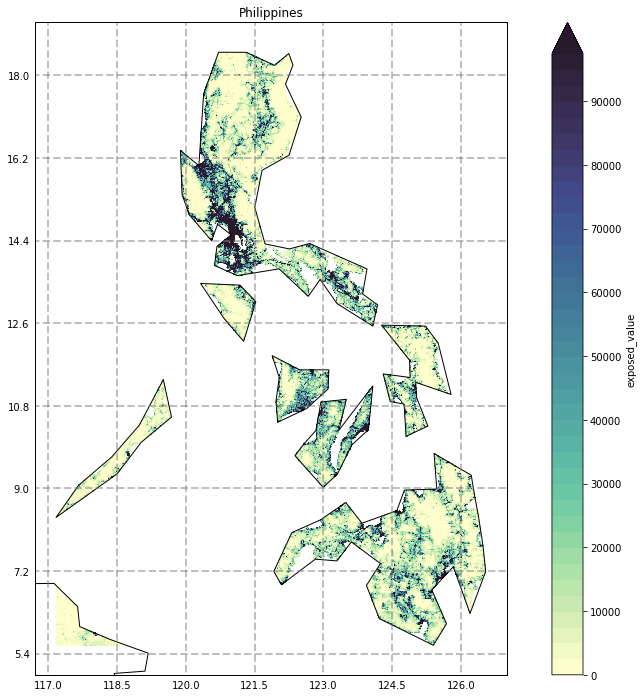

In [6]:
# All Philippines

xmin = 117.17427453
xmax = 126.537423944
ymin = 5.58100332277
ymax = 18.5052273625

cmap = cmocean.cm.deep
lev = np.arange(0,1e5,0.25e4)

evr = ev.sel(lat = slice(ymin,ymax), lon = slice(xmin,xmax))

plt.figure(figsize=(16, 12))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
evr.exposed_value.plot(cmap = cmap, levels = lev)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
plt.title('Philippines')
plt.tight_layout()

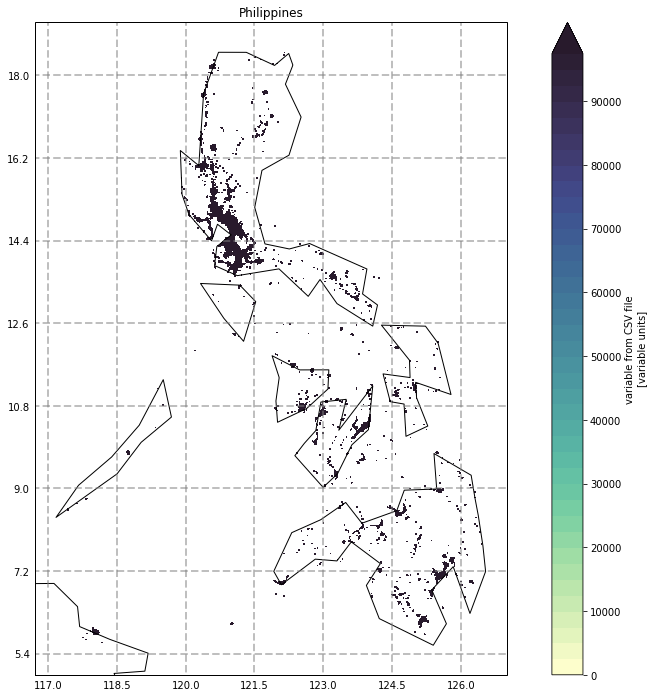

In [7]:
# All Philippines LitPop

xmin = 117.17427453
xmax = 126.537423944
ymin = 5.58100332277
ymax = 18.5052273625

cmap = cmocean.cm.deep
lev = np.arange(0,1e5,0.25e4)

evr_litpop = ev_litpop.sel(lat = slice(ymin,ymax), lon = slice(xmin,xmax))

plt.figure(figsize=(16, 12))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
evr_litpop.data.plot(cmap = cmap, levels = lev)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
plt.title('Philippines')
plt.tight_layout()

In [ ]:
# India

xmin = 68.1766451354
ymin = 7.96553477623
xmax = 97.4025614766
ymax = 35.4940095078

cmap = cmocean.cm.deep
lev = np.arange(0,1e5,0.25e4)

evr = ev.sel(lat = slice(ymin,ymax), lon = slice(xmin,xmax))

plt.figure(figsize=(16, 12))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
evr.exposed_value.plot(cmap = cmap, levels = lev)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
ax.add_feature(feature.BORDERS)
plt.title('India')
plt.tight_layout()